In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
X = np.load('/kaggle/input/sign-language-digits-dataset/X.npy')

Y = np.load('/kaggle/input/sign-language-digits-dataset/Y.npy')

In [ ]:
X

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [ ]:
X.shape

(2062, 64, 64)

In [ ]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
Y.shape

(2062, 10)

In [ ]:
y=np.argmax(Y, axis=1)
y.shape

(2062,)

# Visualizing Images

In [ ]:
def visualize_image(image , label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

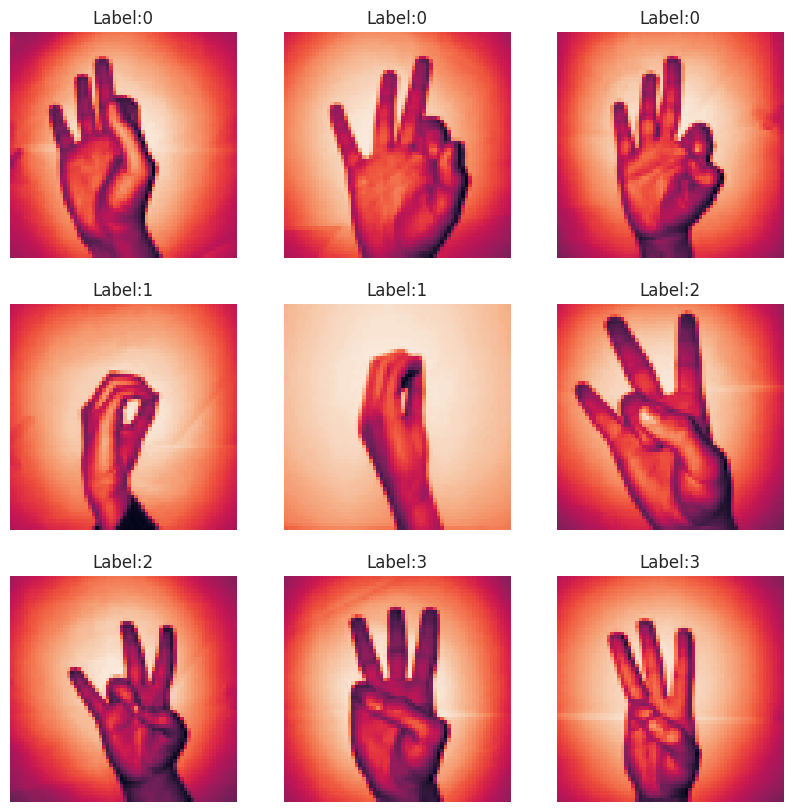

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3 , 3, i+1)
    visualize_image(X[i * 100] , label='Label:' + str(y[i*100]))

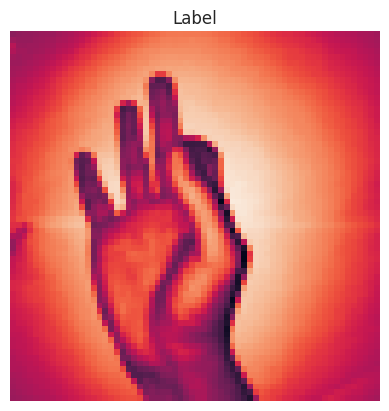

In [ ]:
visualize_image(X[0], label='Label')

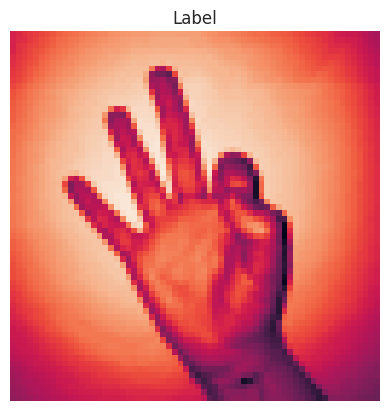

In [ ]:
visualize_image(X[2] , label='Label')

## Preprocessing

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X , y ,train_size=0.7 , shuffle=True, random_state=1)

# Modeling

In [ ]:
inputs = tf.keras.Input(shape=(64,64,1))

conv1 = tf.keras.layers.Conv2D(filters=6 , kernel_size=(5,5) , activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D(pool_size=1)(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16 , kernel_size=(5,5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D(pool_size=1)(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120 ,activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84 , activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10 , activation='softmax')(dense2)

model = tf.keras.Model(inputs=inputs , outputs=outputs)

print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 60, 60, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 56, 56, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │     6,021,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,034,826 (23.02 MB)

 Trainable params: 6,034,826 (23.02 MB)

 Non-trainable params: 0 (0.00 B)

None


# Training

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
            
        )
    ]
    
)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.2916 - loss: 2.0166 - val_accuracy: 0.6990 - val_loss: 0.9403
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.7691 - loss: 0.7375 - val_accuracy: 0.7682 - val_loss: 0.6761
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8926 - loss: 0.3206 - val_accuracy: 0.8235 - val_loss: 0.6352
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9534 - loss: 0.1829 - val_accuracy: 0.7993 - val_loss: 0.6695
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9213 - loss: 0.2632 - val_accuracy: 0.7716 - val_loss: 0.7305
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9682 - loss: 0.1008 - val_accuracy: 0.7682 - val_loss: 0.7370
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9961 - loss: 0.0382 - val_accuracy: 0.8166 - val_loss: 0.7329
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accu

In [ ]:
len(history.history['loss'])

8

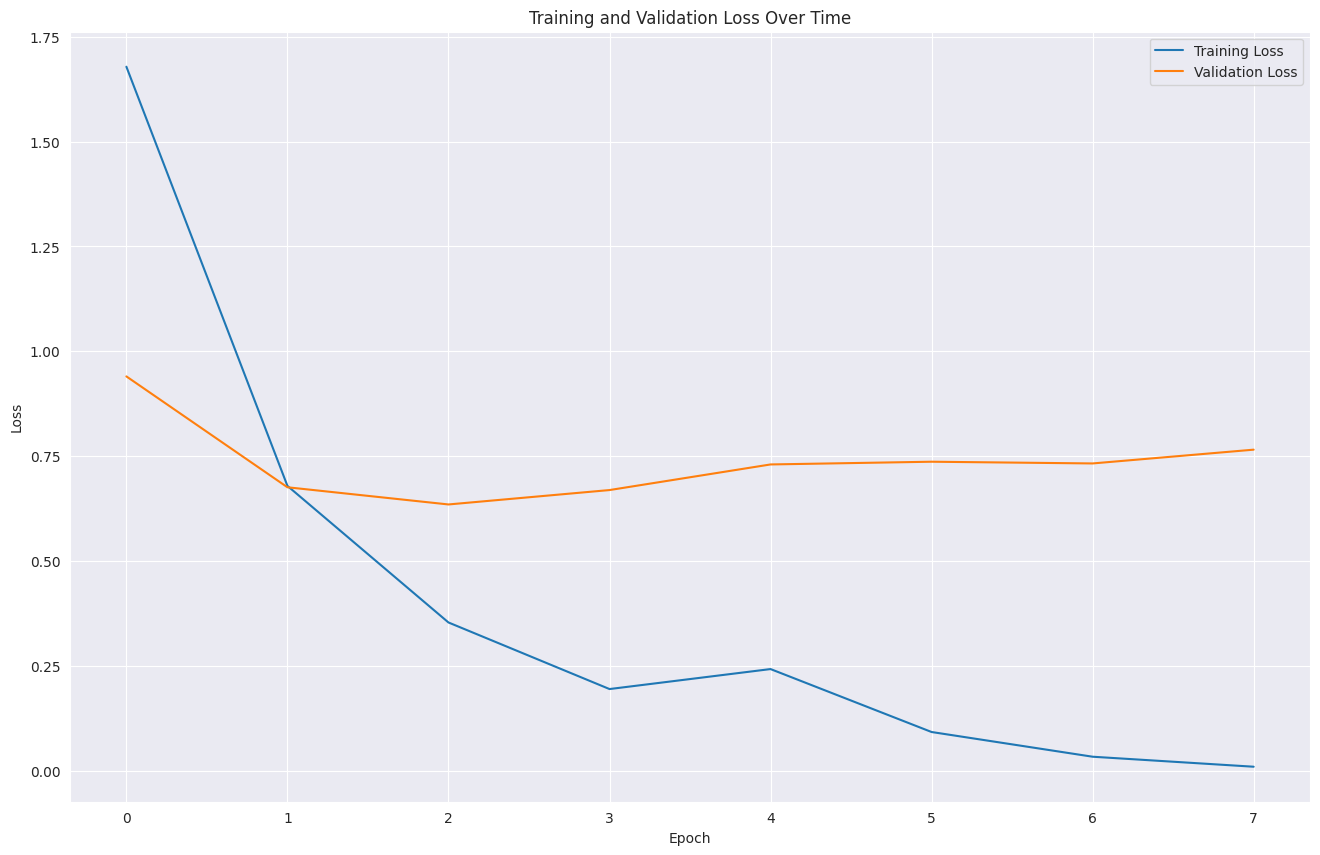

In [ ]:
plt.figure(figsize=(16 , 10))

epoches_range = range(len(history.history['loss']))

plt.plot(epoches_range , history.history['loss'], label='Training Loss')
plt.plot(epoches_range , history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

# Results

In [ ]:
np.max(model.predict(X_test) , axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


array([0.9967493 , 0.7896766 , 0.3916902 , 0.9997492 , 0.98993   ,
       0.8988138 , 0.9987929 , 0.88149935, 0.99926746, 0.858983  ,
       0.7688123 , 0.98620516, 0.37723902, 0.8942828 , 0.7127893 ,
       0.99881154, 0.6992055 , 0.9342615 , 0.67323405, 0.42145014,
       0.67656124, 0.5068076 , 0.5483558 , 0.94321865, 0.7298666 ,
       0.608579  , 0.8917049 , 0.6265651 , 0.8195669 , 0.48213103,
       0.9623971 , 0.99860644, 0.64292663, 0.60799193, 0.91172826,
       0.47447044, 0.66490316, 0.51193875, 0.31789   , 0.9999524 ,
       0.84853965, 0.907545  , 0.91486454, 0.9153656 , 0.9936865 ,
       0.83149207, 0.85363364, 0.34403017, 0.9993431 , 0.57022053,
       0.9780896 , 0.76831037, 0.8567656 , 0.98317015, 0.97851974,
       0.5110793 , 0.88292354, 0.76692325, 0.95713365, 0.43955454,
       0.35140833, 0.97294325, 0.8375112 , 0.66707116, 0.57371426,
       0.45335335, 0.95464605, 0.9853196 , 0.5419384 , 0.9514145 ,
       0.7892151 , 0.9788916 , 0.7253134 , 0.98383135, 0.98241

In [ ]:
def evaluate_model(model , X_test , y_test):
    y_pred = np.argmax(model.predict(X_test) , axis=1)
    cm = confusion_matrix(y_test ,y_pred)
    clr = classification_report(y_test , y_pred)

    results = model.evaluate(X_test , y_test , verbose=0)

    print("Test Loss: {:5f}".format(results[0]))
    print("Test Loss: {:2f}%".format(results[1] *100))


    plt.figure(figsize=(10,10))
    sns.heatmap(cm , annot=True , vmin=0 , fmt='g' , cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n------------------------------------------------\n",clr)
     
    

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Test Loss: 0.638344
Test Loss: 78.998387%


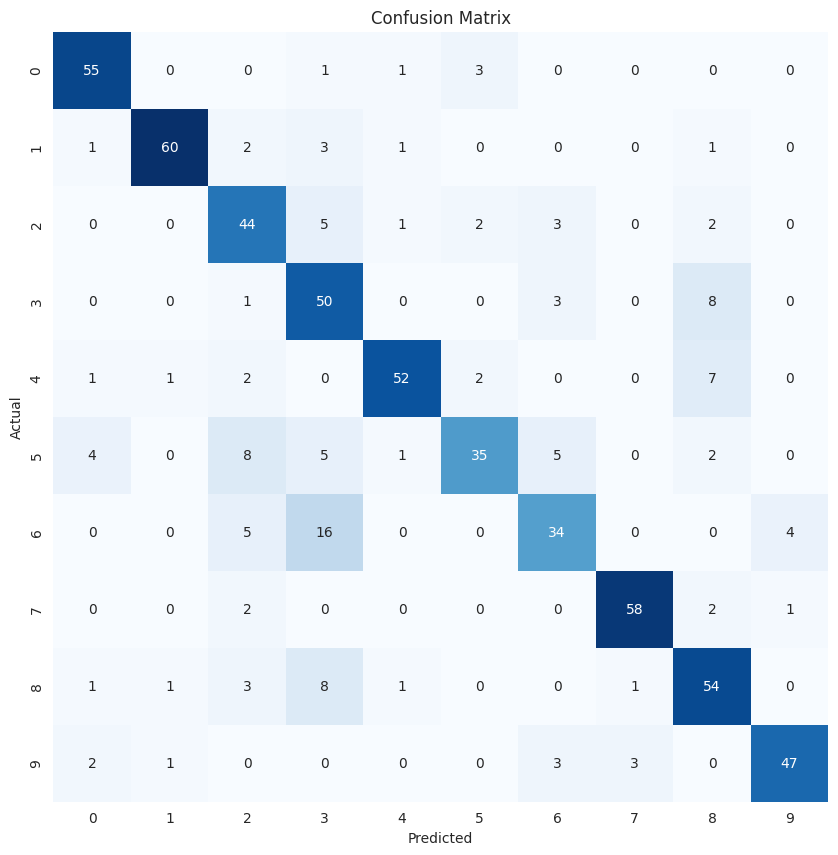

Classification Report:
------------------------------------------------
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.95      0.88      0.92        68
           2       0.66      0.77      0.71        57
           3       0.57      0.81      0.67        62
           4       0.91      0.80      0.85        65
           5       0.83      0.58      0.69        60
           6       0.71      0.58      0.64        59
           7       0.94      0.92      0.93        63
           8       0.71      0.78      0.74        69
           9       0.90      0.84      0.87        56

    accuracy                           0.79       619
   macro avg       0.80      0.79      0.79       619
weighted avg       0.81      0.79      0.79       619



In [ ]:
evaluate_model(model , X_test , y_test)